# MOBILE PRICE CLASSIFICATION

## 1. Data Preparation, Cleaning, and Manipulation

In [1]:
#read train and test file
import numpy as np
import pandas as pd
file = []
def read_file(path) :
    name = input()
    name = pd.read_csv(path)
    file.append(name)
    
read_file('train.csv')
read_file('test.csv')
train = file[0]
test = file[1]
print('Train Size : ', train.shape[0], '\n')
print('Test Size : ', test.shape[0])

2000
2000
Train Size :  2000 

Test Size :  1000


In [2]:
def check(case,df):
    if case=='null':
        return df.isnull().sum()
    elif case=='duplicate':
        return df.duplicated().sum()
    elif case=='outlier':
        q1=df.quantile(0.25)
        q3=df.quantile(0.75)
        iqr=q3-q1
        lower_bound=q1 - 1.5*iqr
        upper_bound=q3 + 1.5*iqr
        print('Upper Bound Value: {}'.format(upper_bound),'\n')
        print('Lower Bound Value: {}'.format(lower_bound))

In [3]:
check('null',train)
check('duplicate',train)
check('outlier', train)

Upper Bound Value: battery_power    2760.500
blue                2.500
clock_speed         4.450
dual_sim            2.500
fc                 16.000
four_g              2.500
int_memory         96.000
m_dep               1.700
mobile_wt         261.500
n_cores            13.000
pc                 30.000
px_height        1944.000
px_width         2770.375
ram              5850.000
sc_h               26.500
sc_w               19.500
talk_time          31.000
three_g             1.000
touch_screen        2.500
wifi                2.500
price_range         4.500
dtype: float64 

Lower Bound Value: battery_power    -293.500
blue               -1.500
clock_speed        -1.550
dual_sim           -1.500
fc                 -8.000
four_g             -1.500
int_memory        -32.000
m_dep              -0.700
mobile_wt          17.500
n_cores            -3.000
pc                -10.000
px_height        -714.000
px_width         -262.625
ram             -1578.000
sc_h               -1.500
sc_w     

In [4]:
#Check Correlation Between Features and Target
for a in train.columns :
    try :
        print(f'Corr {a}: {train[a].corr(train["price_range"])}')
    except :
        pass

Corr battery_power: 0.20072261211373096
Corr blue: 0.02057285406141847
Corr clock_speed: -0.006605690881732064
Corr dual_sim: 0.01744447923722472
Corr fc: 0.02199820777690428
Corr four_g: 0.01477171141723938
Corr int_memory: 0.044434959388987415
Corr m_dep: 0.0008530365050864261
Corr mobile_wt: -0.030302171314386384
Corr n_cores: 0.004399274799457278
Corr pc: 0.03359930021353948
Corr px_height: 0.14885755500042172
Corr px_width: 0.16581750172625506
Corr ram: 0.9170457362649908
Corr sc_h: 0.022986073167424424
Corr sc_w: 0.03871127166448417
Corr talk_time: 0.02185887116237478
Corr three_g: 0.02361121688004502
Corr touch_screen: -0.030411071898218043
Corr wifi: 0.018784812012789
Corr price_range: 1.0


In [5]:
col_list = ['ram','px_height','px_width','battery_power']
#Outlier Removal 
for a in col_list: 
    q1 = train[a].quantile(0.25)
    q3 = train[a].quantile(0.75)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    train = train[(train[a] > 0) & (train[a] < upper)]

## 2. Feature Selection and Model Training

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
feature = ['ram','px_height','px_width','battery_power']
label = ['price_range']
X,y = train[feature].values, train[label].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
#Define Preprocessing for Numeric Columns
num_features = [0,1,2,3]
num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features)
])
pipeline_lr = Pipeline(steps= [
    ('preprocessing', preprocessor),
    ('logregression', LogisticRegression(C=1/0.1, solver='lbfgs', multi_class = 'auto', max_iter = 10000))
])
model_lr = pipeline_lr.fit(X_train,y_train)
print(model_lr)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('logregression', LogisticRegression(C=10.0, max_iter=10000))])


C:\Users\jerry\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## 3. Model Evaluation and Generate Prediction

In [7]:
#Check accuracy using confusion matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
prediction_lr = model_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, prediction_lr)
print(pd.DataFrame(cm_lr))
print('Accuracy : ', accuracy_score(y_test, prediction_lr))

     0    1    2    3
0  119    3    0    0
1    0  119    0    0
2    0    4  119    5
3    0    0    7  123
Accuracy :  0.9619238476953907


In [8]:
import matplotlib.pyplot as plt

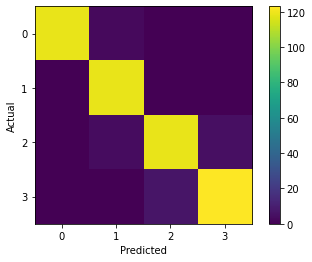

In [9]:
#Plot Confusion Matrix
price_class = [0,1,2,3]
plt.imshow(cm_lr, interpolation = 'nearest')
plt.colorbar()
tick_marks = np.arange(len(price_class))
plt.xticks(tick_marks, price_class)
plt.yticks(tick_marks, price_class)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
print(classification_report(y_test, prediction_lr))#Predict our outcome
test = test[feature]
result = pd.DataFrame(model_lr.predict(test))
final = test.merge(result, left_index = True, right_index = True)
final = final.rename(columns = {0:'price_range'})
final.to_csv('result.csv')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       122
           1       0.94      1.00      0.97       119
           2       0.94      0.93      0.94       128
           3       0.96      0.95      0.95       130

    accuracy                           0.96       499
   macro avg       0.96      0.96      0.96       499
weighted avg       0.96      0.96      0.96       499

